<a href="https://colab.research.google.com/github/ef1s/A1-SY/blob/main/Econ441b-A6-SY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Preprocess your data into scaled input variables and an output variable


In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/CLV.csv")


In [ ]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [ ]:
X = df.drop('Customer Lifetime Value', axis=1)#...
y = df["Customer Lifetime Value"]#...

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter

In [ ]:
simplefilter("ignore", category=ConvergenceWarning)
model = MLPRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(10,), (20,5), (30,), (10,5), (20,10)],
    'activation': ['relu', 'logistic'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'activation': 'relu', 'hidden_layer_sizes': (20, 10)}
Best score:  0.06509615486527318


# 3.) Train a model with the optimal solution from GridSearch

In [ ]:
p_dict = {
  "hidden_layer_sizes": (20,10), "activation" : 'relu'}
model = MLPRegressor(**p_dict).fit(X_train,y_train)

# 4.) What are the in-sample and out of sample MSEs

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)

y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print("In-sample MSE: ", mse_train)
print("Out-of-sample MSE: ", mse_test)

In-sample MSE:  44775894.29429503
Out-of-sample MSE:  39871385.11659546


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense
model = Sequential()
model.add(Dense(units=p_dict['hidden_layer_sizes'][0], activation=p_dict['activation'], input_dim=X_train.shape[1]))
for layer_size in p_dict['hidden_layer_sizes'][1:]:
    model.add(Dense(units=layer_size, activation=p_dict['activation']))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                360       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [ ]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=7590d21ff319a3a8536b4dcc4c23a4d622662b5039f9d26258fe5edbddbed3b6
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann_visualizer


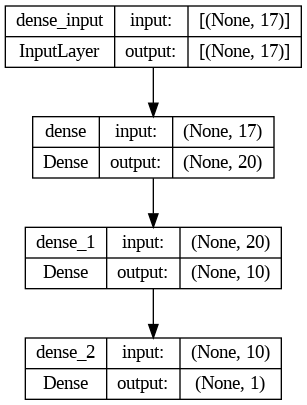

In [25]:
from keras.utils import plot_model
from ann_visualizer.visualize import ann_viz
import graphviz

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

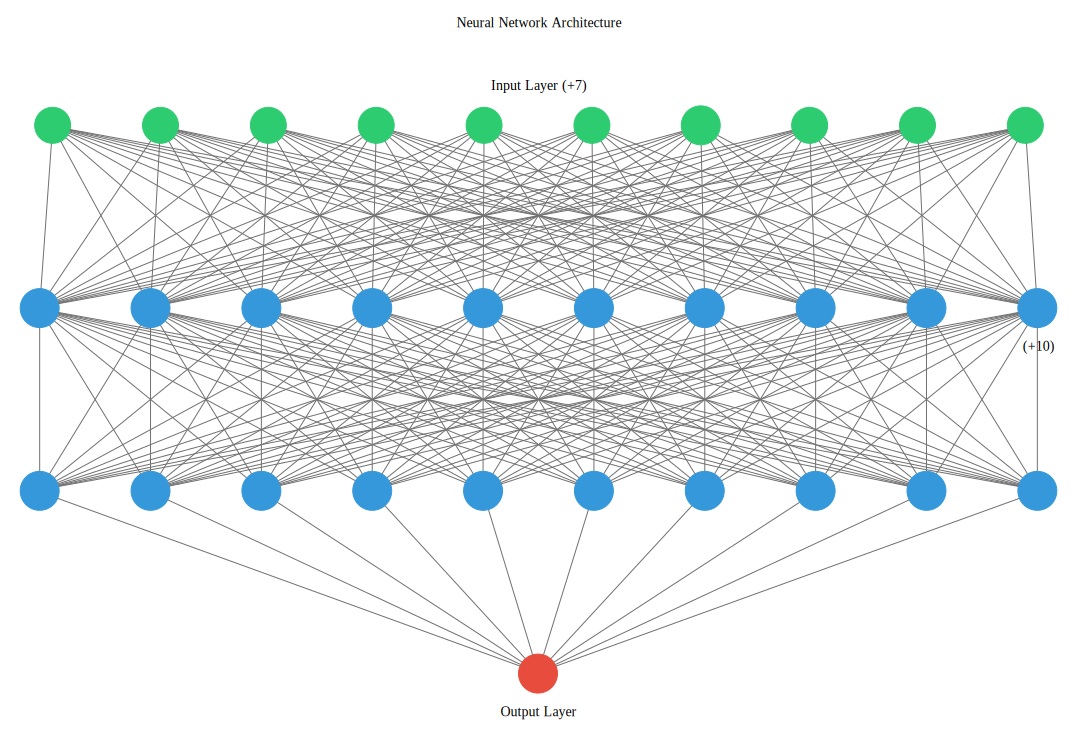

In [28]:
ann_viz(model, filename = 'sy', title="Neural Network Architecture")
graph_file = graphviz.Source.from_file('sy')
graph_file